In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler , OrdinalEncoder
from sklearn.metrics import silhouette_score

In [22]:
df = pd.read_excel("C:/Users/pbani/Downloads/project/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [23]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [24]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [25]:
df.notna().sum()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [26]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [27]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [28]:
new_customer = df.drop(columns = ['StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'InvoiceNo'], axis = 1)
new_customer.sample(5)

,Quantity,UnitPrice,Country
157908,1,14.13,United Kingdom
154300,1,8.25,United Kingdom
93018,13,2.08,United Kingdom
6882,8,12.72,United Kingdom
476561,1,1.45,United Kingdom


In [29]:
X = df[['Quantity','UnitPrice']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.01628867, -0.02130135],
       [-0.01628867, -0.01262006],
       [-0.00711777, -0.01923438],
       ...,
       [-0.02545958, -0.00476555],
       [-0.02545958, -0.00476555],
       [-0.03004503,  0.00350235]])

In [30]:
# Convert cathegorical feature to integers
countries = df['Country']
countries_2d = [[country] for country in countries]
ordinal = OrdinalEncoder()
countries_2d_encoded = ordinal.fit_transform(countries_2d)
countries_2d_encoded

array([[36.],
       [36.],
       [36.],
       ...,
       [13.],
       [13.],
       [13.]])

In [31]:
customers_scaled = pd.DataFrame(X_scaled, columns = X.columns)
customers_scaled['Country'] = countries_2d_encoded
customers_scaled

,Quantity,UnitPrice,Country
0,-0.016289,-0.021301,36.0
1,-0.016289,-0.012620,36.0
2,-0.007118,-0.019234,36.0
3,-0.016289,-0.012620,36.0
4,-0.016289,-0.012620,36.0
...,...,...,...
541904,0.011224,-0.038871,13.0
541905,-0.016289,-0.025952,13.0
541906,-0.025460,-0.004766,13.0
541907,-0.025460,-0.004766,13.0


In [32]:
countries_encoded = countries_2d_encoded.ravel()

if len(countries_encoded) == X_scaled.shape[0]:
    X_scaled_with_countries = np.concatenate((X_scaled, countries_2d_encoded), axis=1)

X_scaled_with_countries

array([[-1.62886737e-02, -2.13013503e-02,  3.60000000e+01],
       [-1.62886737e-02, -1.26200559e-02,  3.60000000e+01],
       [-7.11776751e-03, -1.92343755e-02,  3.60000000e+01],
       ...,
       [-2.54595799e-02, -4.76555138e-03,  1.30000000e+01],
       [-2.54595799e-02, -4.76555138e-03,  1.30000000e+01],
       [-3.00450330e-02,  3.50234809e-03,  1.30000000e+01]])

In [38]:
inertia = []
for nr_c in range(2, 100):
    kmeans = KMeans(n_clusters=nr_c, init='k-means++', algorithm='elkan', max_iter=300, random_state=42)
    kmeans.fit(X_scaled_with_countries)
    inertia.append(kmeans.inertia_)

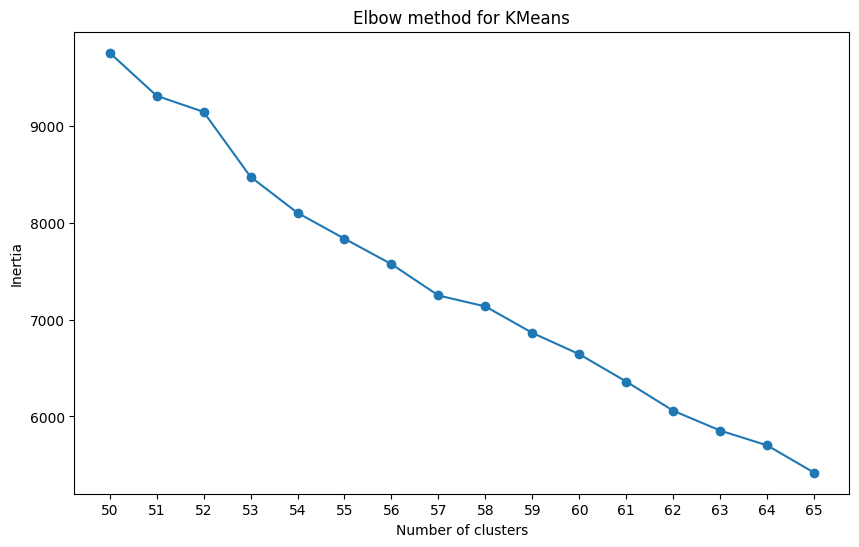

In [39]:
#Plot for the perfect cluster number
cluster_range = range(50, 66) 
inertia_subset = inertia[50:66]
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_subset, marker='o')
plt.title('Elbow method for KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.show()

In [41]:
kmeans = KMeans(n_clusters = 54, algorithm='elkan',random_state = 42, n_init = 'auto')
kmeans_labels = kmeans.fit_predict(X_scaled_with_countries)
kmeans_labels

array([0, 0, 0, ..., 1, 1, 1])

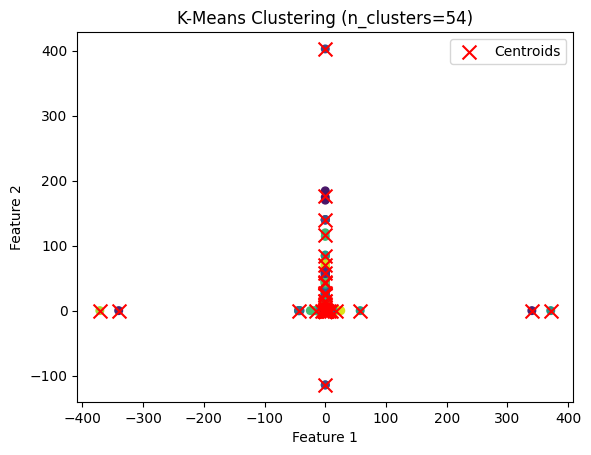

In [42]:
plt.scatter(X_scaled_with_countries[:, 0], X_scaled_with_countries[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title("K-Means Clustering (n_clusters=54)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

C:\Users\pbani\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


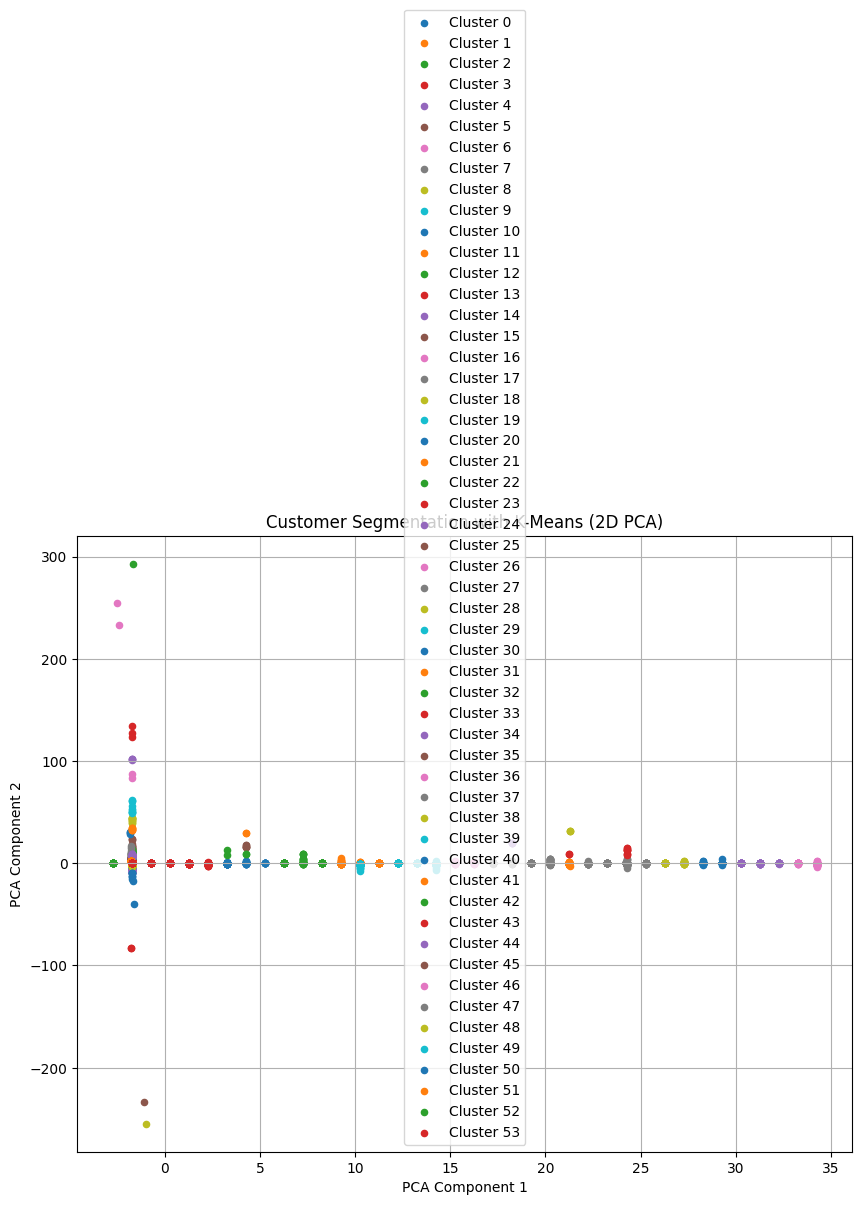

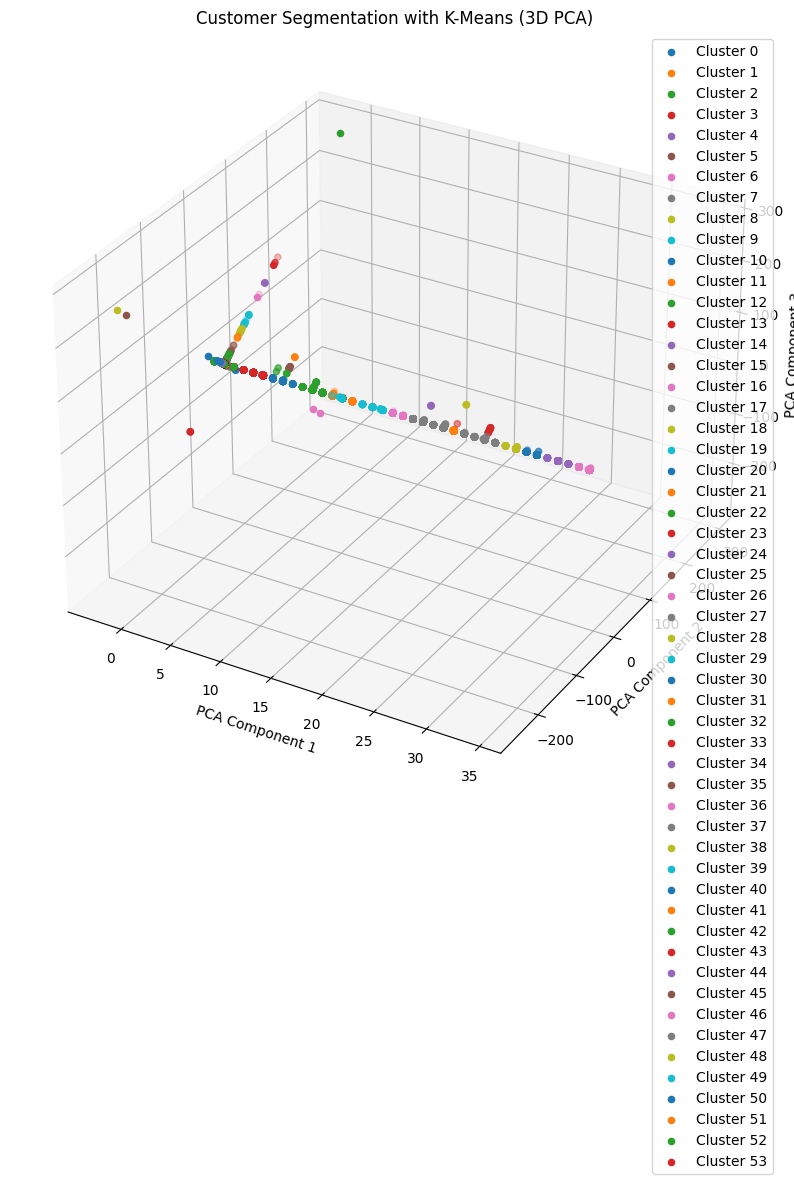

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled_with_countries)

# 2D Scatter Plot
plt.figure(figsize=(10, 8))
for cluster in np.unique(kmeans_labels):
    plt.scatter(
        X_pca_2d[kmeans_labels == cluster, 0],
        X_pca_2d[kmeans_labels == cluster, 1],
        label=f"Cluster {cluster}",
        s=20  # Adjust size if needed
    )
plt.title("Customer Segmentation with K-Means (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

# 3D Scatter Plot (Optional, for better cluster visualization)
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled_with_countries)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster in np.unique(kmeans_labels):
    ax.scatter(
        X_pca_3d[kmeans_labels == cluster, 0],
        X_pca_3d[kmeans_labels == cluster, 1],
        X_pca_3d[kmeans_labels == cluster, 2],
        label=f"Cluster {cluster}",
        s=20  # Adjust size if needed
    )

ax.set_title("Customer Segmentation with K-Means (3D PCA)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.legend()
plt.show()


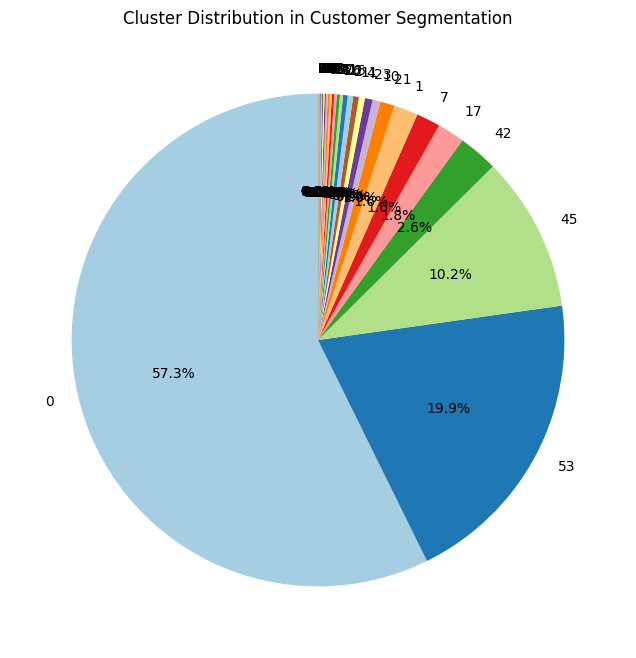

In [45]:
# Create a pie chart of cluster distribution
cluster_counts = pd.Series(kmeans_labels).value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Cluster Distribution in Customer Segmentation")
plt.show()


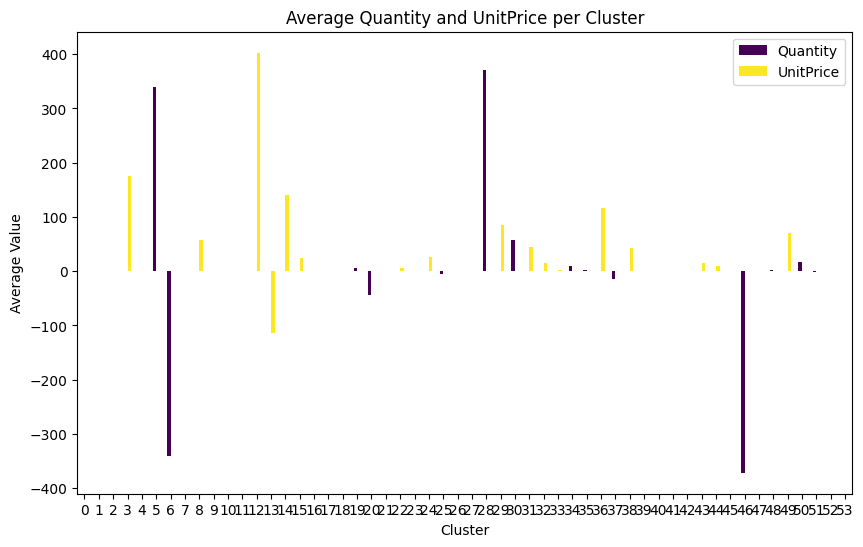

In [46]:
# Add the cluster labels to the dataframe
customers_scaled['Cluster'] = kmeans_labels

# Group by the clusters and calculate the average Quantity and UnitPrice
cluster_avg = customers_scaled.groupby('Cluster')[['Quantity', 'UnitPrice']].mean()

# Plotting the bar chart
cluster_avg.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Average Quantity and UnitPrice per Cluster")
plt.ylabel("Average Value")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.show()


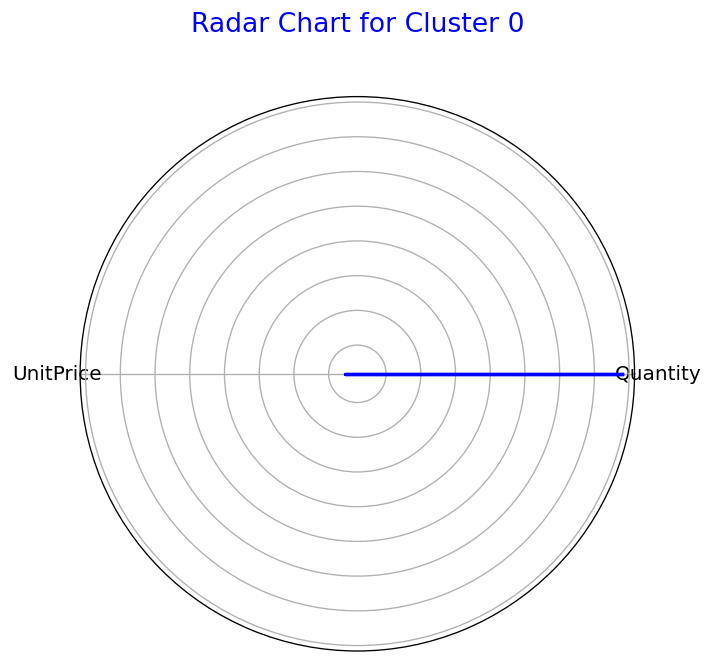

In [52]:
# Function to plot radar chart
def radar_chart(data, labels, title):
    categories = labels
    N = len(categories)

    values = data.tolist()  # Convert to list to ensure it matches the angles array length
    values += values[:1]    # Add the first value at the end to close the loop
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]    # Add the first angle at the end to close the loop

    fig, ax = plt.subplots(figsize=(6, 6), dpi=120, subplot_kw=dict(polar=True))

    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_yticklabels([])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, color='black', fontsize=12)

    plt.title(title, size=16, color='blue', y=1.1)
    plt.show()

# Selecting one cluster (e.g., cluster 0) for visualization
cluster_0_data = cluster_avg.iloc[10]

# Labels for features
labels = ['Quantity', 'UnitPrice']

# Plotting the radar chart for cluster 0
radar_chart(cluster_0_data, labels, "Radar Chart for Cluster 0")
